# Malaria Prevalence Analysis in Benue state


In [1]:
#importing the necessary packages

import pandas as pd 
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
#pip install xlrd

In [3]:
#load malaria datasets

malaria = pd.read_excel(r"C:\Users\USER\Downloads\Benue_Malaria.xls")


In [4]:
print(malaria.head())

     LGA Month  Year  Persons_fever  RDT_tested  positive_by RDT  \
0   Ado    Dec  2021            788         788              526   
1   Ado    Oct  2021            470         470              325   
2   Ado    Jul  2021            616         581              367   
3   Ado    Sep  2021            652         652              352   
4   Ado    Aug  2021            894         893              599   

   Microscopy_tested  positive_by_Microscopy datetime  
0                  0                       0  2021-12  
1                  0                       0  2021-10  
2                  0                       0  2021-07  
3                  0                       0  2021-09  
4                  0                       0  2021-08  


In [5]:

# loading the climate data 

climate = pd.read_excel(r"C:\Users\USER\Downloads\Climate Data.xlsx")
#printing the first few rows
print(climate.head())

  Month  Year  Rainfall (mm)  Temperature (celsuis) datetime
0   Jan  2016            0.0                   26.2  2016-01
1   Feb  2016            0.0                   29.9  2016-02
2   Mar  2016           52.6                   31.1  2016-03
3   Apr  2016           76.9                   30.3  2016-04
4   May  2016          233.1                   28.8  2016-05


In [6]:
# merge on the year column

df = pd.merge(malaria, climate, on = "datetime", how = "inner")



In [7]:
#printing the merged data
# To understand the number of rows and columns in the datasets
df.shape




(1104, 13)

In [8]:
# checking for missing values

df.isna().sum()

LGA                       0
Month_x                   0
Year_x                    0
Persons_fever             0
RDT_tested                0
positive_by RDT           0
Microscopy_tested         0
positive_by_Microscopy    0
datetime                  0
Month_y                   0
Year_y                    0
Rainfall (mm)             0
Temperature (celsuis)     0
dtype: int64

In [9]:
#checking for duplicate

df.duplicated().sum()

0

In [10]:


#check for nulls and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LGA                     1104 non-null   object 
 1   Month_x                 1104 non-null   object 
 2   Year_x                  1104 non-null   int64  
 3   Persons_fever           1104 non-null   int64  
 4   RDT_tested              1104 non-null   int64  
 5   positive_by RDT         1104 non-null   int64  
 6   Microscopy_tested       1104 non-null   int64  
 7   positive_by_Microscopy  1104 non-null   int64  
 8   datetime                1104 non-null   object 
 9   Month_y                 1104 non-null   object 
 10  Year_y                  1104 non-null   int64  
 11  Rainfall (mm)           1104 non-null   float64
 12  Temperature (celsuis)   1104 non-null   float64
dtypes: float64(2), int64(7), object(4)
memory usage: 112.3+ KB


In [11]:
# Summary statistics 
df.describe()


#Insights:
### approximately 1651 people reported fever per observation period, from as low as 85 up to 11,629 cases
### The maximum persons tested with RDT is equal to persons with fever suggesting sometimes all suspedted cases were tested.
### approximately 64% of those tested by RDT are positive (1000/1562) indicating persistent high transmission
### Diagnostic reliance is almost entirely on RDTs. Microscopy capacity is very limited in routine surveillance

,Year_x,Persons_fever,RDT_tested,positive_by RDT,Microscopy_tested,positive_by_Microscopy,Year_y,Rainfall (mm),Temperature (celsuis)
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,2022.500000,1650.901268,1561.894928,1000.000906,50.789855,27.375000,2022.500000,105.110417,28.318750
std,1.118541,1395.054397,1322.627779,1024.440702,138.632014,68.039964,1.118541,112.240322,1.781333
min,2021.000000,85.000000,19.000000,53.000000,0.000000,0.000000,2021.000000,0.000000,25.600000
25%,2021.750000,791.500000,767.000000,470.500000,0.000000,0.000000,2021.750000,0.000000,27.000000
50%,2022.500000,1230.000000,1186.000000,709.500000,0.000000,0.000000,2022.500000,95.200000,27.900000
75%,2023.250000,2089.250000,1952.250000,1175.500000,25.000000,16.000000,2023.250000,162.175000,28.875000
max,2024.000000,11629.000000,11629.000000,9929.000000,1364.000000,756.000000,2024.000000,449.500000,33.500000


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 9 numerical features : ['Year_x', 'Persons_fever', 'RDT_tested', 'positive_by RDT', 'Microscopy_tested', 'positive_by_Microscopy', 'Year_y', 'Rainfall (mm)', 'Temperature (celsuis)']

We have 4 categorical features : ['LGA', 'Month_x', 'datetime', 'Month_y']


In [13]:
# Group by LGA and count number of cases
cases_per_lga = df.groupby("LGA")["positive_by RDT"].sum().reset_index()

# Rename columns for clarity
cases_per_lga.columns = ["LGA", "Number_of_Cases"]

# Display results
print(cases_per_lga)

              LGA  Number_of_Cases
0            Ado             39785
1          Agatu             37055
2            Apa             38515
3         Buruku             55366
4          Gboko             52997
5           Guma             50353
6      Gwer East             94687
7      Gwer West             65399
8    Katsina-Ala             80872
9      Konshisha             63202
10        Kwande             27755
11          Logo             32067
12       Makurdi             38708
13           Obi             31408
14      Ogbadibo             31979
15       Ohimini             21661
16           Oju             26391
17       Okpokwu             38623
18        Otukpo             57605
19         Tarka             58484
20          Ukum             56247
21       Ushongo             56594
22     Vandeikya             48248


C:\Users\USER\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


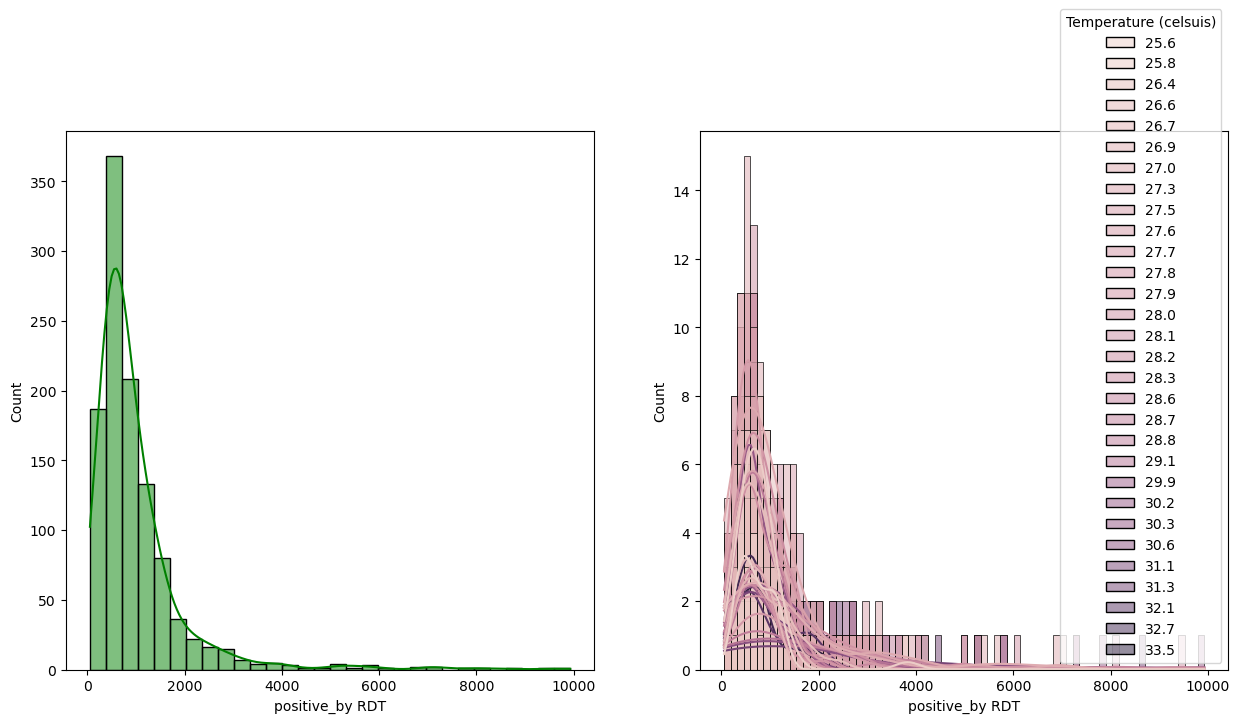

C:\Users\USER\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


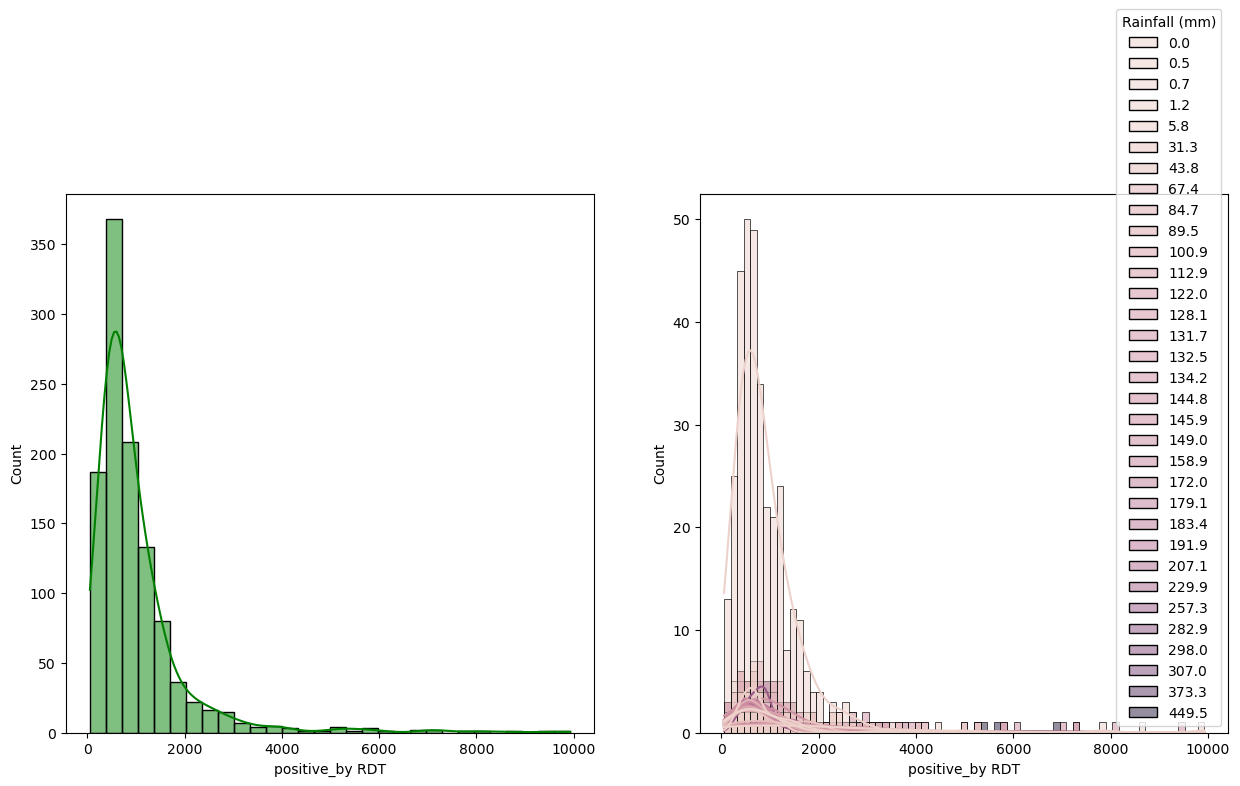

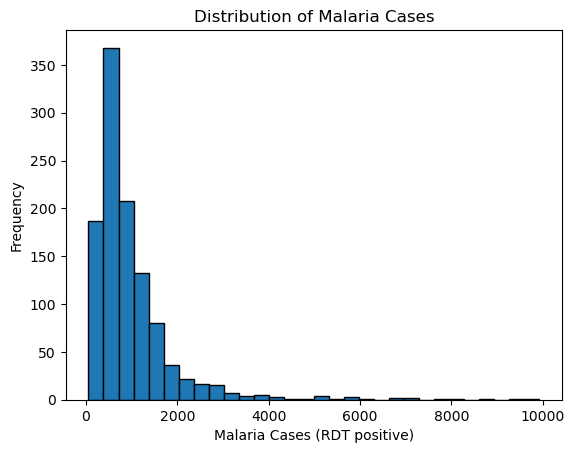

In [14]:

# Visualizing malaria prevalence distribution by climate factors
# Temperature
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='positive_by RDT',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='positive_by RDT',kde=True,hue='Temperature (celsuis)')
plt.show()

# Distribution of Rainfall

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='positive_by RDT',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='positive_by RDT',kde=True,hue='Rainfall (mm)')
plt.show()

# Distribution of malaria prevalence
plt.hist(df['positive_by RDT'], bins=30, edgecolor='black')
plt.xlabel('Malaria Cases (RDT positive)')
plt.ylabel('Frequency')
plt.title('Distribution of Malaria Cases')
plt.show()
# from the output below is it evident that malaria cases are highly skewed positively
#Most values are clustered at the lower end, with a long tail of large/extreme values

In [15]:
# to calaculate the skewness of the data

print(df['Rainfall (mm)'].skew())

print(df['Temperature (celsuis)'].skew())

print(df['positive_by RDT'].skew())
#  A few periods/locations have very high malaria positives (possible outbreaks), while most are low.

## Using raw values in regression or time-series models may cause poor fit or biased coefficients because the distribution is not normal.

0.9970870004065184
1.0140845217883907
3.9952800403613633


In [16]:
# Normalization and reducing the skewness of the data
np.sqrt(df['positive_by RDT'])


0       22.934690
1       15.033296
2       16.881943
3       16.881943
4       33.136083
          ...    
1099    28.284271
1100    30.033315
1101    25.903668
1102    21.725561
1103    31.304952
Name: positive_by RDT, Length: 1104, dtype: float64

In [17]:
df['positive_by RDT'].skew()

## the output still shows that the data is highly dispersed and there can not conduct a regression analysis on it as it not mamally distributed
## Even after log transform, the data distribution is still pulled to the right with most values clustered on the lower end.

3.9952800403613633

In [18]:
# checking for the mean and varinace
mean_val = df['positive_by RDT'].mean()
var_val = df['positive_by RDT'].var()

print("Mean:", mean_val)
print("Variance:", var_val)
print("Variance-to-Mean Ratio:", var_val / mean_val)

### if the variance to mean ration is approximately 1 then poisson appropriate
### if the ratio >> 1 ( like 10, 100, 1000 then it shows strong overdispertion  negative binomial preffered

Mean: 1000.0009057971015
Variance: 1049478.7515857595
Variance-to-Mean Ratio: 1049.4778009718093


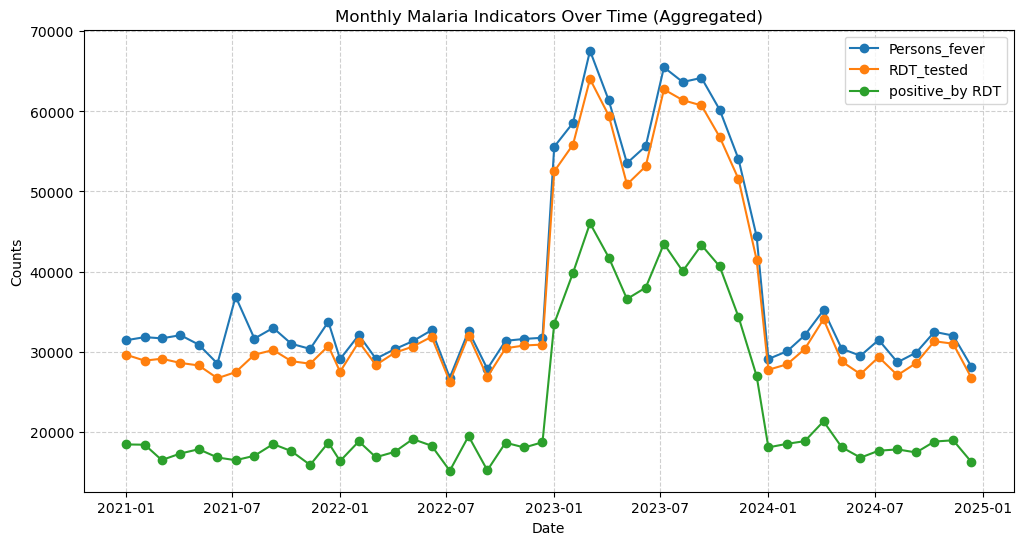

In [19]:
# plotting malaria prevalence over time 
# Create a proper Date column from Year + Months
df['Date'] = pd.to_datetime(df['datetime'].astype(str) + '-' + df['Month_x'].astype(str) + '-01')

# Aggregate by Date (sum across LGAs for each month)
df_monthly = df.groupby('Date')[['Persons_fever','RDT_tested','positive_by RDT']].sum().reset_index()

# Plot malaria indicators over time
plt.figure(figsize=(12,6))
for col in ['Persons_fever','RDT_tested','positive_by RDT']:
    plt.plot(df_monthly['Date'], df_monthly[col], label=col, marker='o')

plt.legend()
plt.title("Monthly Malaria Indicators Over Time (Aggregated)")
plt.xlabel("Date")
plt.ylabel("Counts")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#insights:
#### There is a steady increase in the number of persons with fever, RDT-tested and positive by RDT from 2021 to 2023.
#### Additionally, from 2023 - 2024, there is a high spike of number of persosn with fever, tested by RDT and positive by RDT 
### And this spike could be due the flooding experience in Benue state in 2023 as well as the reduce use of intervention plans as deployed in 2020

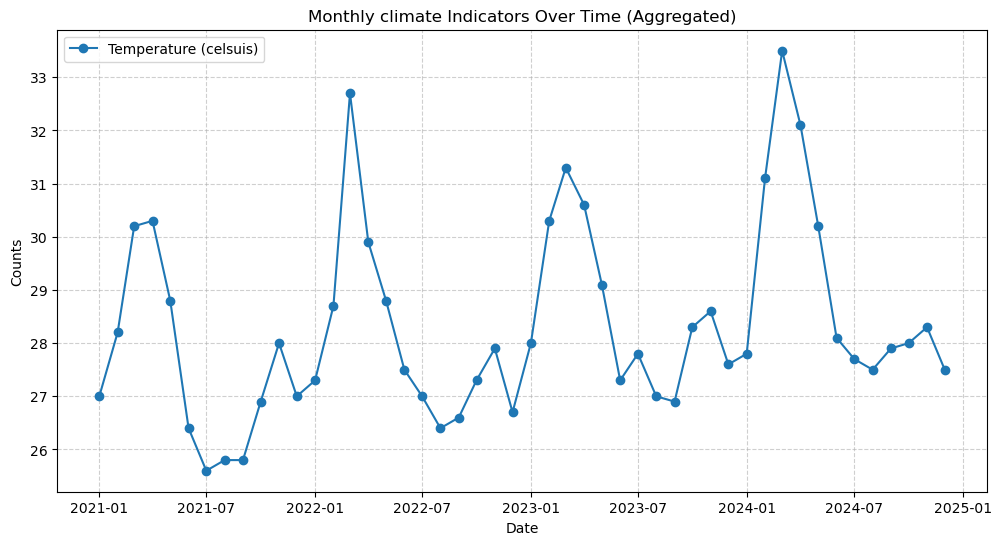

In [20]:
# plotting climate factors over time 
# Create a proper Date column from Year + Months
df['Date'] = pd.to_datetime(df['datetime'])


# Aggregate by Date (sum across LGAs for each month)
df_monthly = df.groupby('Date')[['Temperature (celsuis)']].mean().reset_index()

# Plot Average temperature over time
plt.figure(figsize=(12,6))
for col in ['Temperature (celsuis)']:
    plt.plot(df_monthly['Date'], df_monthly[col], label=col, marker='o')

plt.legend()
plt.title("Monthly climate Indicators Over Time (Aggregated)")
plt.xlabel("Date")
plt.ylabel("Counts")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

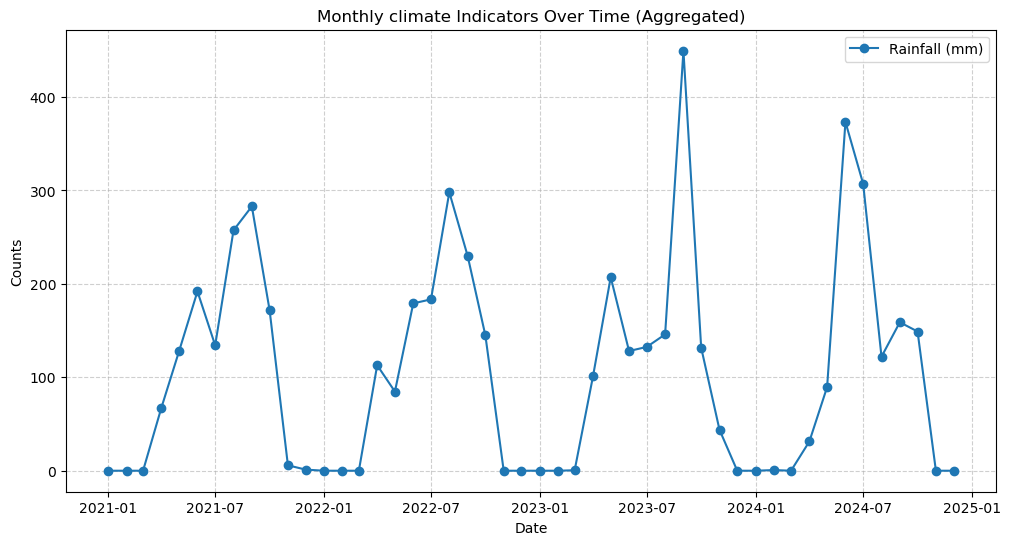

In [21]:
# plotting climate factors over time 
# Create a proper Date column from Year + Months
df['Date'] = pd.to_datetime(df['datetime'])

# Aggregate by Date (sum across LGAs for each month)
df_monthly = df.groupby('Date')[['Rainfall (mm)']].mean().reset_index()

# Plot Average Raifall over time
plt.figure(figsize=(12,6))
for col in ['Rainfall (mm)']:
    plt.plot(df_monthly['Date'], df_monthly[col], label=col, marker='o')

plt.legend()
plt.title("Monthly climate Indicators Over Time (Aggregated)")
plt.xlabel("Date")
plt.ylabel("Counts")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [22]:
# Correlation Analysis 
# Identify whether malaria prevalence is related to climate variables using the 



#selecting relevant variables 
malaria_vars = ["positive_by RDT", "positive_by_Microscopy", "Persons_fever"]
climate_vars = ["Rainfall (mm)", "Temperature (celsuis)"]

# subset dataframe to only include these
data = df[malaria_vars + climate_vars]

# spearman correlation

spearman_corr = data.corr(method = "spearman")

# === Pearson Correlation ===
pearson_corr = data.corr(method="pearson")

print("=== Pearson Correlation ===")
print(pearson_corr)
print("\n=== Spearman Correlation ===")
print(spearman_corr)
#Insights

## There is a weak relationship between the malaria key variables and climate factors such as rainfall and temperature as seen from the visuals
## Fever ↔ RDT positives is the strongest relationship (makes sense clinically).

## Microscopy doesn’t correlate as strongly with fever or RDT → may reflect differences in sensitivity/specificity of the tests.

## Climate factors (rainfall, temperature) show little same-month correlation with malaria outcomes, but this does not mean there’s no link — you likely need to check lagged correlations (e.g., rainfall in month t vs malaria in month t+1 or t+2).

## Rainfall and temperature have a clear inverse relationship, consistent with environmental dynamics.

=== Pearson Correlation ===
                        positive_by RDT  positive_by_Microscopy  \
positive_by RDT                1.000000                0.070039   
positive_by_Microscopy         0.070039                1.000000   
Persons_fever                  0.920292                0.289505   
Rainfall (mm)                  0.027757                0.027148   
Temperature (celsuis)          0.056547                0.022701   

                        Persons_fever  Rainfall (mm)  Temperature (celsuis)  
positive_by RDT              0.920292       0.027757               0.056547  
positive_by_Microscopy       0.289505       0.027148               0.022701  
Persons_fever                1.000000       0.026779               0.039417  
Rainfall (mm)                0.026779       1.000000              -0.443513  
Temperature (celsuis)        0.039417      -0.443513               1.000000  

=== Spearman Correlation ===
                        positive_by RDT  positive_by_Microscopy  \
posi

In [23]:

# Rename to match what pandas expects
df = df.rename(columns={"Year_y": "year", "Month_y": "month"})

# Ensuring the date column is properly assigned.
df['Date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1), errors='coerce')

# Sort by Date
df = df.sort_values('Date')

# Number of months to check lags for
max_lag = 6 

lagged_corrs = {}

for lag in range(1, max_lag+1):
    # Shift rainfall and temperature by "lag" months
    df[f'Rainfall_lag{lag}'] = df['Rainfall (mm)'].shift(lag)
    df[f'Temp_lag{lag}'] = df['Temperature (celsuis)'].shift(lag)
    
    # Calculate correlations with malaria outcome (RDT positives as example)
    pearson_rain = df[['positive_by RDT', f'Rainfall_lag{lag}']].corr(method='pearson').iloc[0,1]
    pearson_temp = df[['positive_by RDT', f'Temp_lag{lag}']].corr(method='pearson').iloc[0,1]
    
    spearman_rain = df[['positive_by RDT', f'Rainfall_lag{lag}']].corr(method='spearman').iloc[0,1]
    spearman_temp = df[['positive_by RDT', f'Temp_lag{lag}']].corr(method='spearman').iloc[0,1]
    
    # Save results
    lagged_corrs[lag] = {
        "Pearson Rainfall": pearson_rain,
        "Pearson Temperature": pearson_temp,
        "Spearman Rainfall": spearman_rain,
        "Spearman Temperature": spearman_temp
    }

# Convert results to a nice table
lagged_corrs_df = pd.DataFrame(lagged_corrs).T
print("=== Lagged Correlations (Rainfall & Temp vs RDT positives) ===")
print(lagged_corrs_df)

#insights 

####  from both correlation analysis Rainfall has a delayed effetct - malaria cases (positive_RDT) tends to rise a few months after increased rainfall, consistence with mosquitos breeding and transmission cycles
#### While temperature has a small but more immediate influence on malaria transmission compared to rainfall.
###### It is safe to say Rainfall effect lagged(delayed impact, clearer after 4-6 months) giving that mosquito populations expand with rainfall but malaria cases surge only months later once vector density and transimission clcles peak.
##### Indicating that malaria prevalence in Benue state infleuneced by climate variability, but not in a simple linear way
##### 

=== Lagged Correlations (Rainfall & Temp vs RDT positives) ===
   Pearson Rainfall  Pearson Temperature  Spearman Rainfall  \
1          0.023896             0.057184          -0.007943   
2          0.026127             0.053223          -0.006483   
3          0.032893             0.052660          -0.003247   
4          0.037905             0.052828           0.001637   
5          0.041934             0.055396           0.008559   
6          0.052395             0.046940           0.020642   

   Spearman Temperature  
1              0.048482  
2              0.039189  
3              0.038102  
4              0.036007  
5              0.036817  
6              0.020279  


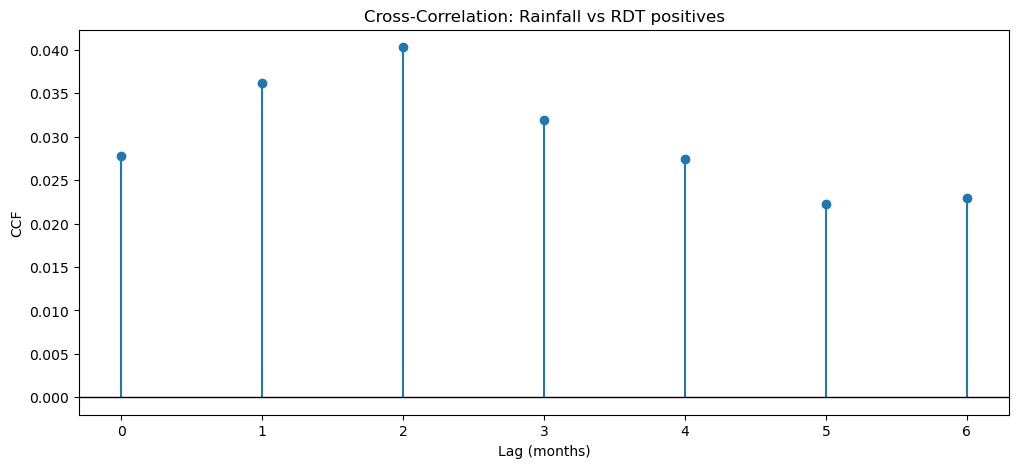

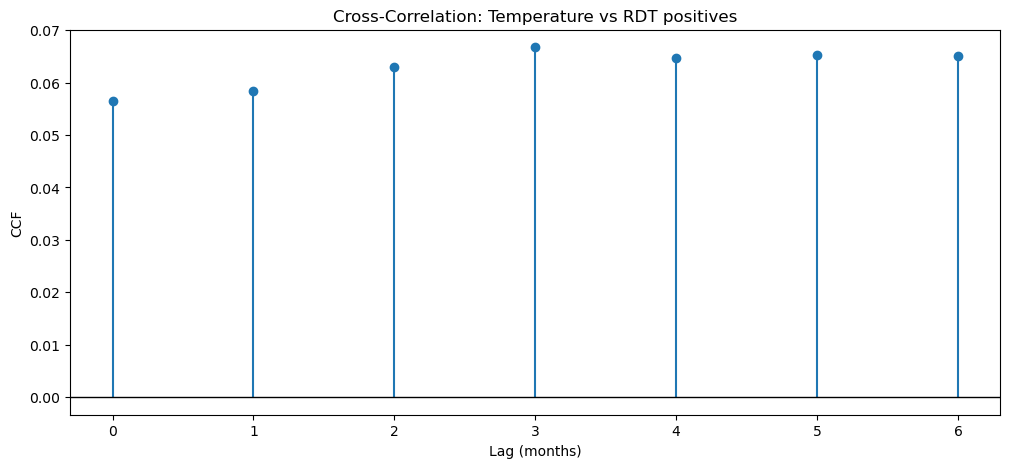

[0.05654699 0.0583463  0.06306009 0.06674826 0.0646313  0.06533279
 0.06505101]


In [24]:

## Visualizing the lagged correlation variables

from statsmodels.tsa.stattools import ccf
df_capy = df.copy()

# Drop missing values (important for time series)
data = df_capy.dropna(subset=['Rainfall (mm)','Temperature (celsuis)','positive_by RDT'])

# Extract the series
rainfall = data['Rainfall (mm)']
temperature = data['Temperature (celsuis)']
rdt = data['positive_by RDT']

# Compute CCF (rainfall vs RDT)
ccf_rainfall = ccf(rainfall, rdt)[:7]   # first 12 lags
ccf_temp = ccf(temperature, rdt)[:7]

lags = range(len(ccf_rainfall))

# Plot CCF for rainfall
plt.figure(figsize=(12,5))
plt.stem(lags, ccf_rainfall, basefmt=" ")
plt.axhline(0, color='black', linewidth=1)
plt.title("Cross-Correlation: Rainfall vs RDT positives")
plt.xlabel("Lag (months)")
plt.ylabel("CCF")
plt.show()

# Plot CCF for temperature
plt.figure(figsize=(12,5))
plt.stem(lags, ccf_temp, basefmt=" ")
plt.axhline(0, color='black', linewidth=1)
plt.title("Cross-Correlation: Temperature vs RDT positives")
plt.xlabel("Lag (months)")
plt.ylabel("CCF")
plt.show()

print(ccf_temp)

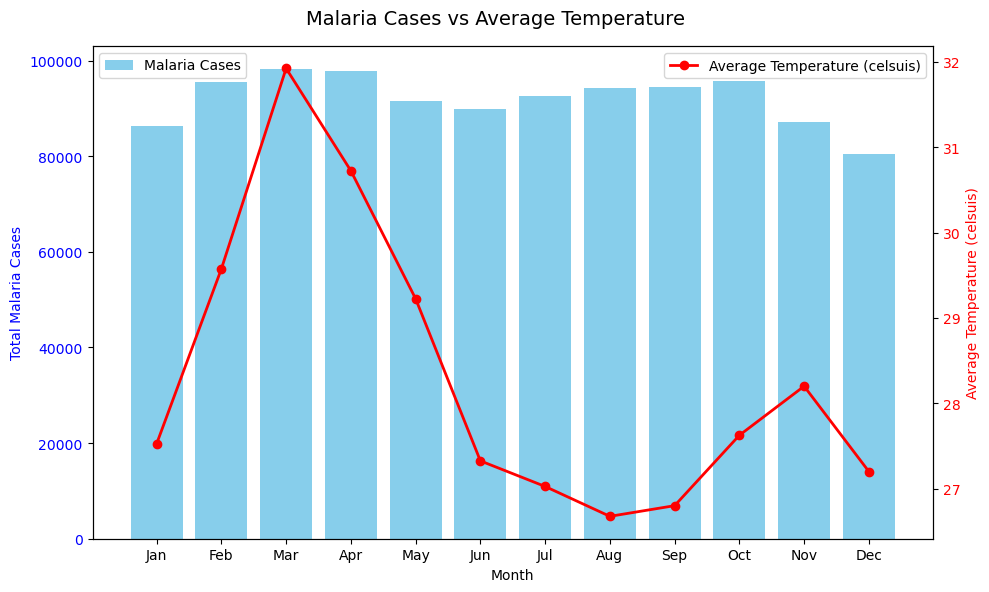

In [25]:
## To understand the trend of malaria cases and temperature
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")


# Extract month names
df["Month"] = df["datetime"].dt.strftime("%b")  

# Group by month
malaria_by_month = df.groupby("Month")["positive_by RDT"].sum()
rainfall_avg_by_month = df.groupby("Month")["Temperature (celsuis)"].mean()

# Ensure correct month order
month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
malaria_by_month = malaria_by_month.reindex(month_order)
rainfall_avg_by_month = rainfall_avg_by_month.reindex(month_order)

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(10,6))

# Malaria cases (bar chart)
ax1.bar(malaria_by_month.index, malaria_by_month.values, color="skyblue", label="Malaria Cases")
ax1.set_xlabel("Month")
ax1.set_ylabel("Total Malaria Cases", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Rainfall (average, line chart)
ax2 = ax1.twinx()
ax2.plot(rainfall_avg_by_month.index, rainfall_avg_by_month.values, color="red", marker="o", linewidth=2, label="Average Temperature (celsuis)")
ax2.set_ylabel("Average Temperature (celsuis)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Title + Legends
fig.suptitle("Malaria Cases vs Average Temperature", fontsize=14)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

### As total cases spiked in March, with an average temperature of 32 degree celsuis and while this happened whcih indicate most seen situation of malaria prevalence relationship with temperature.
### Additionally as temperature decrease over the months there is an increase in the number of cases steadilty indicatin that temperature between 27-32 celsuis contribute to mosquitoes breeding and leading to increase in malaria cases as seen


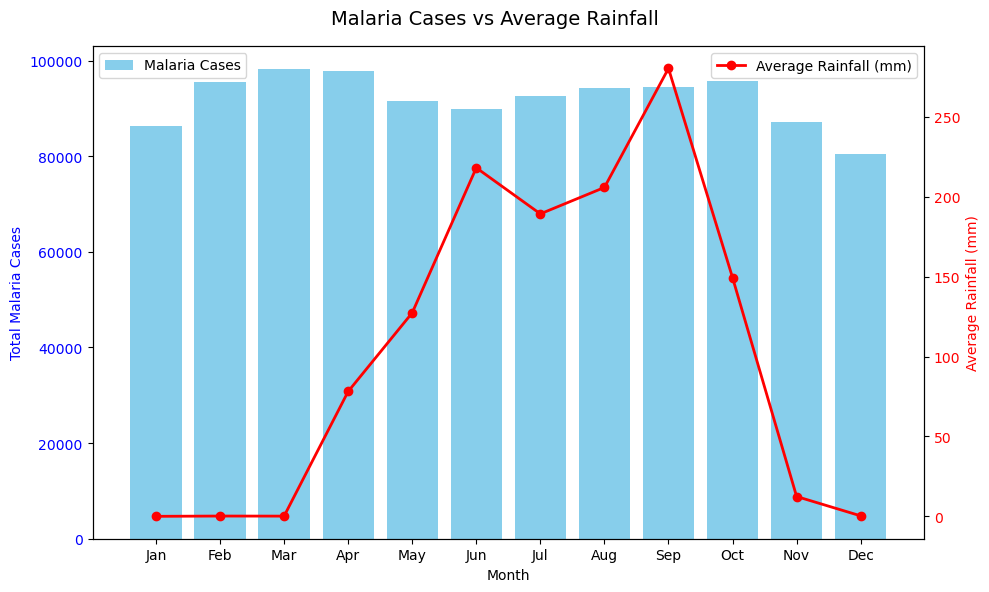

In [26]:
####==== creating visuals to understand the trends of climate parameters and positive by Rd

#  datetime column is parsed correctly
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

# Extract month names
df["Month"] = df["datetime"].dt.strftime("%b")  # e.g., Jan, Feb, Mar

# Group by month
malaria_by_month = df.groupby("Month")["positive_by RDT"].sum()
rainfall_avg_by_month = df.groupby("Month")["Rainfall (mm)"].mean()

# Ensure correct month order
month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
malaria_by_month = malaria_by_month.reindex(month_order)
rainfall_avg_by_month = rainfall_avg_by_month.reindex(month_order)

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(10,6))

# Malaria cases (bar chart)
ax1.bar(malaria_by_month.index, malaria_by_month.values, color="skyblue", label="Malaria Cases")
ax1.set_xlabel("Month")
ax1.set_ylabel("Total Malaria Cases", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Rainfall (average, line chart)
ax2 = ax1.twinx()
ax2.plot(rainfall_avg_by_month.index, rainfall_avg_by_month.values, color="red", marker="o", linewidth=2, label="Average Rainfall (mm)")
ax2.set_ylabel("Average Rainfall (mm)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Title + Legends
fig.suptitle("Malaria Cases vs Average Rainfall", fontsize=14)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()
# the rain contribute to an increase in the number of cases as seen from the visual, cases spiked as the rainfall increases

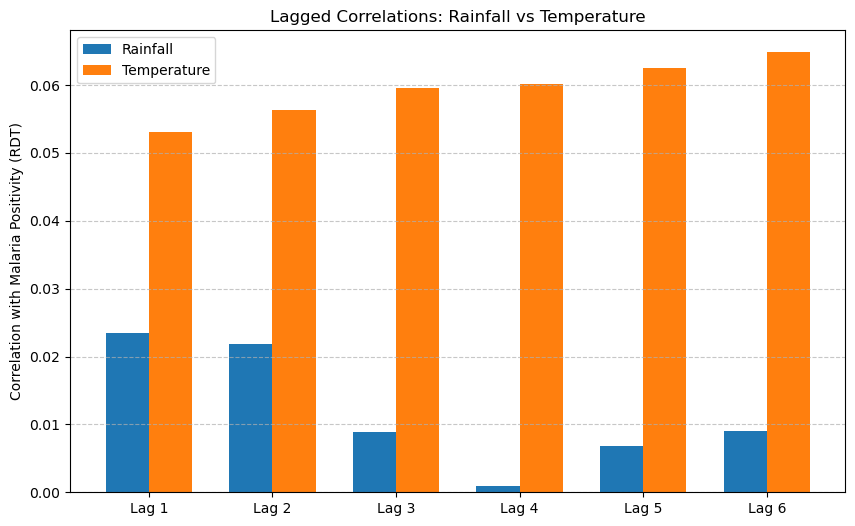

Lag 1: Rainfall corr = 0.023, Temperature corr = 0.053
Lag 2: Rainfall corr = 0.022, Temperature corr = 0.056
Lag 3: Rainfall corr = 0.009, Temperature corr = 0.060
Lag 4: Rainfall corr = 0.001, Temperature corr = 0.060
Lag 5: Rainfall corr = 0.007, Temperature corr = 0.063
Lag 6: Rainfall corr = 0.009, Temperature corr = 0.065


In [27]:
# Make a temporary copy with datetime as index
df_log = df.copy()
df_log = df_log.set_index("datetime").sort_index()


max_lag = 6  

for lag in range(1, max_lag + 1):
    df_log[f"Rainfall_lag{lag}"] = df_log["Rainfall (mm)"].shift(lag)
    df_log[f"Temperature_lag{lag}"] = df_log["Temperature (celsuis)"].shift(lag)

lags = range(1, 7)
corrs = {
    "Rainfall": [df_log["positive_by RDT"].corr(df_log[f"Rainfall_lag{lag}"]) for lag in lags],
    "Temperature": [df_log["positive_by RDT"].corr(df_log[f"Temperature_lag{lag}"]) for lag in lags]
}

# Compute correlations 
rain_corrs = [df_log["positive_by RDT"].corr(df_log[f"Rainfall_lag{lag}"]) for lag in lags]
temp_corrs = [df_log["positive_by RDT"].corr(df_log[f"Temperature_lag{lag}"]) for lag in lags]

x = np.arange(len(lags))  # positions

width = 0.35  # bar width

plt.figure(figsize=(10,6))
plt.bar(x - width/2, rain_corrs, width, label="Rainfall")
plt.bar(x + width/2, temp_corrs, width, label="Temperature")

plt.xticks(x, [f"Lag {lag}" for lag in lags])
plt.ylabel("Correlation with Malaria Positivity (RDT)")
plt.title("Lagged Correlations: Rainfall vs Temperature")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print correlation values for inspection
for lag in lags:
    print(f"Lag {lag}: "
          f"Rainfall corr = {rain_corrs[lag-1]:.3f}, "
          f"Temperature corr = {temp_corrs[lag-1]:.3f}")

### insights
#==== Rainfall
##Correlations are very weak (0.001–0.023).
##This suggests that rainfall in the previous 1–6 months has little to no linear relationship with malaria positivity in your dataset.
##Possible reasons:
##The effect of rainfall may be non-linear (e.g., too much rain washes away breeding sites).
##The relationship may depend on local geography or lagged interactions with temperature

#==== Temperature
# Correlations are consistently higher than rainfall (0.053–0.065).
# Although still weak (close to zero), the positive trend suggests that warmer temperatures 1–6 months earlier may slightly increase malaria positivity.
# This makes sense biologically: warmer climates favor mosquito survival and parasite development.

# Final thoughts: Temperature seems to be a more useful predictor of malaria positivity than rainfall in this dataset.Rainfall on its own is not strongly predictive — but rainfall combined with temperature


# ML with lagged features only

In [28]:
df_model = df_log.copy()

df_model.head()


# Drop rows with NaNs (only affects first few months)
df_model = df_model.dropna(subset=[
    "Rainfall_lag1", "Rainfall_lag2", "Temp_lag5", "Temp_lag6",
    "Temperature_lag1", "Temperature_lag2", "Temperature_lag3",
    "Temperature_lag4", "Temperature_lag5", "Temperature_lag6"
]).reset_index(drop=True)


df_model = df_model.reset_index(drop=True)

df_model.head()

,LGA,Month_x,Year_x,Persons_fever,RDT_tested,positive_by RDT,Microscopy_tested,positive_by_Microscopy,month,year,...,Temp_lag5,Rainfall_lag6,Temp_lag6,Month,Temperature_lag1,Temperature_lag2,Temperature_lag3,Temperature_lag4,Temperature_lag5,Temperature_lag6
0,Oju,Jan,2021,2698,2415,1102,283,165,Jan,2021,...,27.0,0.0,27.0,Jan,27.0,27.0,27.0,27.0,27.0,27.0
1,Ohimini,Jan,2021,1023,985,520,0,0,Jan,2021,...,27.0,0.0,27.0,Jan,27.0,27.0,27.0,27.0,27.0,27.0
2,Ogbadibo,Jan,2021,1746,1718,900,0,0,Jan,2021,...,27.0,0.0,27.0,Jan,27.0,27.0,27.0,27.0,27.0,27.0
3,Obi,Jan,2021,787,697,378,0,0,Jan,2021,...,27.0,0.0,27.0,Jan,27.0,27.0,27.0,27.0,27.0,27.0
4,Makurdi,Jan,2021,1872,1865,1032,0,0,Jan,2021,...,27.0,0.0,27.0,Jan,27.0,27.0,27.0,27.0,27.0,27.0


In [29]:
X = df_model.drop(
    columns=[
        'Year_x', 
        'Microscopy_tested', 
        'positive_by_Microscopy', 
        'positive_by RDT',
        'Month_x',
        'Date',
        'LGA',
        'month',
        'year',
        'Rainfall_lag3',
        'Rainfall_lag4',
        'Rainfall_lag5',
        'Rainfall_lag6',
        'Temperature_lag1',
        'Temperature_lag2',
        'Temperature_lag3',
        'Temperature_lag4',
        'Temp_lag1',
        'Temp_lag2',
        'Temp_lag3',
        'Temp_lag4',
        'Temp_lag5',
        'Temp_lag6',
        'RDT_tested',
        'Month'
    ], 
    axis=1
)

In [30]:
Y= df_model['positive_by RDT']

In [31]:
X.head()



,Persons_fever,Rainfall (mm),Temperature (celsuis),Rainfall_lag1,Rainfall_lag2,Temperature_lag5,Temperature_lag6
0,2698,0.0,27.0,0.0,0.0,27.0,27.0
1,1023,0.0,27.0,0.0,0.0,27.0,27.0
2,1746,0.0,27.0,0.0,0.0,27.0,27.0
3,787,0.0,27.0,0.0,0.0,27.0,27.0
4,1872,0.0,27.0,0.0,0.0,27.0,27.0


In [32]:
Y.head()

0    1102
1     520
2     900
3     378
4    1032
Name: positive_by RDT, dtype: int64

In [33]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((873, 7), (219, 7))

In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

# ----------------------------
# Define evaluation function
# ----------------------------
def evaluate_model(Y_true, Y_pred):
    mae = mean_absolute_error(Y_true, Y_pred)
    rmse = np.sqrt(mean_squared_error(Y_true, Y_pred))
    r2 = r2_score(Y_true, Y_pred)
    return mae, rmse, r2




# ----------------------------
# Models
# ----------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

# ----------------------------
# Train + Evaluate
# ----------------------------
model_list = []
r2_list = []

for name, model in models.items():
    model.fit(X_train, Y_train)  # Train model

    # Predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Evaluate
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)

    # Print results
    print(name)
    model_list.append(name)
    
    print('Model performance for Training set')
    print("- RMSE: {:.4f}".format(model_train_rmse))
    print("- MAE: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- RMSE: {:.4f}".format(model_test_rmse))
    print("- MAE: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*40)
    print('\n')


Linear Regression
Model performance for Training set
- RMSE: 413.0198
- MAE: 221.1553
- R2 Score: 0.8406
----------------------------------
Model performance for Test set
- RMSE: 352.3170
- MAE: 211.1191
- R2 Score: 0.8760


Lasso
Model performance for Training set
- RMSE: 413.0897
- MAE: 220.9595
- R2 Score: 0.8406
----------------------------------
Model performance for Test set
- RMSE: 351.6008
- MAE: 210.0276
- R2 Score: 0.8765


Ridge
Model performance for Training set
- RMSE: 413.0203
- MAE: 221.1299
- R2 Score: 0.8406
----------------------------------
Model performance for Test set
- RMSE: 352.2531
- MAE: 211.0414
- R2 Score: 0.8761


K-Neighbors Regressor
Model performance for Training set
- RMSE: 385.3729
- MAE: 187.2694
- R2 Score: 0.8613
----------------------------------
Model performance for Test set
- RMSE: 349.2825
- MAE: 208.9379
- R2 Score: 0.8781


Decision Tree
Model performance for Training set
- RMSE: 3.4313
- MAE: 0.2417
- R2 Score: 1.0000
-----------------------

# Case 1(without the lagged features) ML

In [24]:
# In this case, the monthly rainfall and temperature are directly used to predict the positive by RDT
# which will then serve as the baseline for the lagged model.

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings




### preparing X and Y

In [50]:
X = df.drop(
    columns=[
        'Year_x', 
        'LGA', 
        'Microscopy_tested', 
        'positive_by_Microscopy', 
        'positive_by RDT',
        'datetime',
        'Month_x', 
        'Month_y', 
        'Year_y', 
        'Date'
    ], 
    axis=1
)


In [51]:
X.tail()

,Persons_fever,RDT_tested,Rainfall (mm),Temperature (celsuis)
1099,1357,1327,0.0,28.3
1100,1478,1431,0.0,28.3
1101,1145,1137,0.0,28.3
1102,845,829,0.0,28.3
1103,1598,1592,0.0,28.3


In [52]:
Y= df['positive_by RDT']

In [53]:
Y

0        526
1        226
2        285
3        285
4       1098
        ... 
1099     800
1100     902
1101     671
1102     472
1103     980
Name: positive_by RDT, Length: 1104, dtype: int64

In [54]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape


((883, 4), (221, 4))

### 
Create an Evaluate Function to give all metrics after model Training

In [55]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [56]:
from statsmodels.genmod.families import NegativeBinomial
import statsmodels.api as sm
from statsmodels.genmod.families import NegativeBinomial

# Create a wrapper so it behaves like your sklearn models
class NegativeBinomialRegressor:
    def __init__(self):
        self.model = None
    
    def fit(self, X, Y):
        X = sm.add_constant(X)  # statsmodels needs intercept
        self.model = sm.GLM(Y, X, family=NegativeBinomial()).fit()
        return self
    
    def predict(self, X):
        X = sm.add_constant(X, has_constant='add')
        return self.model.predict(X)

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Negative Binomial": NegativeBinomialRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train model

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


##The number of malaria-positive cases by RDT can be reliably predicted using persons with fever, rainfall levels, and malaria case counts. A simple linear model already explains most of the relationship, suggesting that these predictors have a stable, direct effect on RDT-confirmed malaria cases. More complex models (like Random Forest) didn’t improve much, meaning the relationship is not overly nonlinear.

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 277.9350
- Mean Absolute Error: 169.6337
- R2 Score: 0.9179
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 440.2386
- Mean Absolute Error: 202.9253
- R2 Score: 0.8684


Lasso
Model performance for Training set
- Root Mean Squared Error: 277.9357
- Mean Absolute Error: 169.5988
- R2 Score: 0.9179
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 440.1375
- Mean Absolute Error: 202.9177
- R2 Score: 0.8684


Ridge
Model performance for Training set
- Root Mean Squared Error: 277.9350
- Mean Absolute Error: 169.6334
- R2 Score: 0.9179
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 440.2379
- Mean Absolute Error: 202.9252
- R2 Score: 0.8684


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 259.3258
- Mean Absolute Error: 135.6315
- R2 Score: 0.

C:\Users\USER\AppData\Local\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


### Results

In [35]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,K-Neighbors Regressor,0.878138
1,Lasso,0.876515
2,Ridge,0.876056
0,Linear Regression,0.876011
5,Random Forest Regressor,0.860466
4,Decision Tree,0.598184


In [58]:
####  Linear Regression

lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
Y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, Y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.84


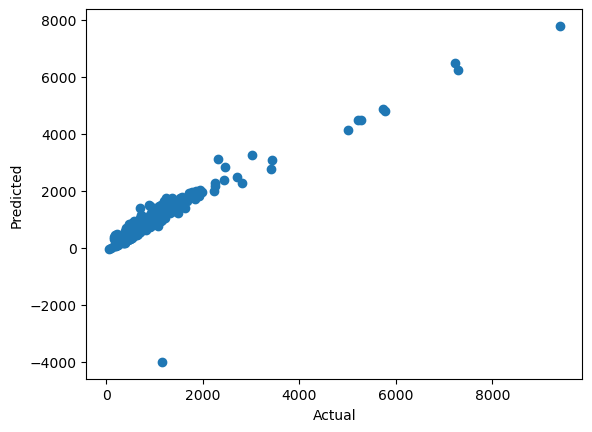

In [59]:

plt.scatter(Y_test,Y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


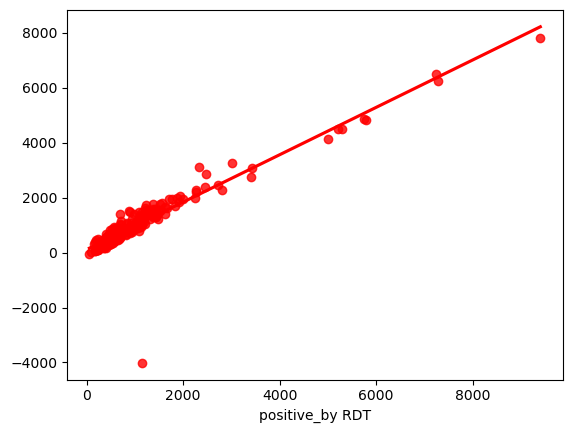

In [60]:
sns.regplot(x=Y_test,y=Y_pred,ci=None,color ='red');

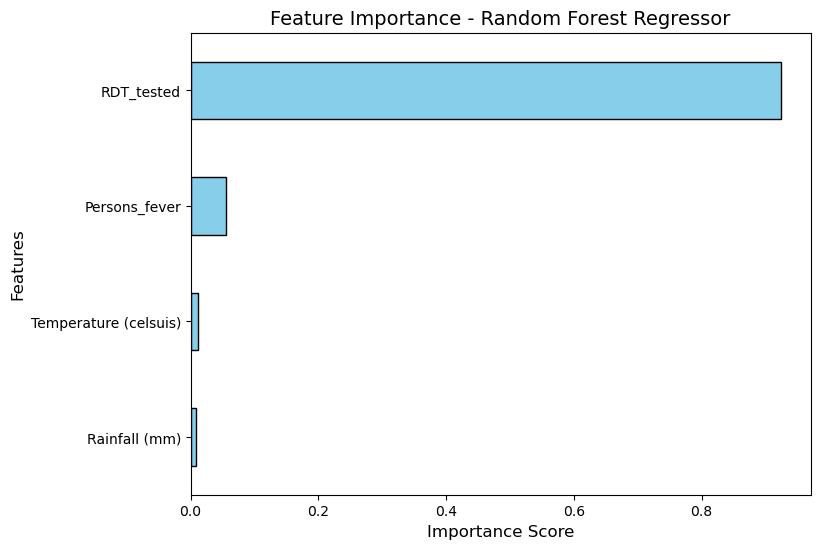

In [61]:
# Train Random Forest again separately
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns  

# Put into a pandas Series for easy visualization
feat_importances = pd.Series(importances, index=features).sort_values(ascending=True)

# Plot feature importance
plt.figure(figsize=(8,6))
feat_importances.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Feature Importance - Random Forest Regressor", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()

# ML with lag features 

In [26]:
df_model = df_log.copy()

df_model.head()


# Drop rows with NaNs (only affects first few months)
df_model = df_model.dropna(subset=[
    "Rainfall_lag1", "Rainfall_lag2", "Temp_lag5", "Temp_lag6",
    "Temperature_lag1", "Temperature_lag2", "Temperature_lag3",
    "Temperature_lag4", "Temperature_lag5", "Temperature_lag6"
]).reset_index(drop=True)


df_model = df_model.reset_index(drop=True)

df_model.head()


,LGA,Month_x,Year_x,Persons_fever,RDT_tested,positive_by RDT,Microscopy_tested,positive_by_Microscopy,month,year,...,Rainfall_lag5,Temp_lag5,Rainfall_lag6,Temp_lag6,Temperature_lag1,Temperature_lag2,Temperature_lag3,Temperature_lag4,Temperature_lag5,Temperature_lag6
0,Oju,Jan,2021,2698,2415,1102,283,165,Jan,2021,...,0.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
1,Ohimini,Jan,2021,1023,985,520,0,0,Jan,2021,...,0.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
2,Ogbadibo,Jan,2021,1746,1718,900,0,0,Jan,2021,...,0.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
3,Obi,Jan,2021,787,697,378,0,0,Jan,2021,...,0.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
4,Makurdi,Jan,2021,1872,1865,1032,0,0,Jan,2021,...,0.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0


In [27]:
X = df_model.drop(
    columns=[
        'Year_x', 
        'Microscopy_tested', 
        'positive_by_Microscopy', 
        'positive_by RDT',
        'Month_x',
        'Date',
        'LGA',
        'month',
        'year',
        'Rainfall_lag3',
        'Rainfall_lag4',
        'Rainfall_lag5',
        'Rainfall_lag6',
        'Temperature_lag1',
        'Temperature_lag2',
        'Temperature_lag3',
        'Temperature_lag4',
        'Temp_lag1',
        'Temp_lag2',
        'Temp_lag3',
        'Temp_lag4',
        'Temp_lag5',
        'Temp_lag6',
    ], 
    axis=1
)

In [28]:
X.head()

,Persons_fever,RDT_tested,Rainfall (mm),Temperature (celsuis),Rainfall_lag1,Rainfall_lag2,Temperature_lag5,Temperature_lag6
0,2698,2415,0.0,27.0,0.0,0.0,27.0,27.0
1,1023,985,0.0,27.0,0.0,0.0,27.0,27.0
2,1746,1718,0.0,27.0,0.0,0.0,27.0,27.0
3,787,697,0.0,27.0,0.0,0.0,27.0,27.0
4,1872,1865,0.0,27.0,0.0,0.0,27.0,27.0


In [29]:
print(X.dtypes)



Persons_fever              int64
RDT_tested                 int64
Rainfall (mm)            float64
Temperature (celsuis)    float64
Rainfall_lag1            float64
Rainfall_lag2            float64
Temperature_lag5         float64
Temperature_lag6         float64
dtype: object


In [30]:


Y= df_model['positive_by RDT']

In [39]:
Y.tail()


1087     849
1088     200
1089     561
1090    1467
1091     480
Name: positive_by RDT, dtype: int64

In [32]:
# For X
print("X rows:", len(X))

# For Y
print("Y rows:", len(Y))

X rows: 1092
Y rows: 1092


In [33]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((873, 8), (219, 8))

In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

# ----------------------------
# Define evaluation function
# ----------------------------
def evaluate_model(Y_true, Y_pred):
    mae = mean_absolute_error(Y_true, Y_pred)
    rmse = np.sqrt(mean_squared_error(Y_true, Y_pred))
    r2 = r2_score(Y_true, Y_pred)
    return mae, rmse, r2




# ----------------------------
# Models
# ----------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

# ----------------------------
# Train + Evaluate
# ----------------------------
model_list = []
r2_list = []

for name, model in models.items():
    model.fit(X_train, Y_train)  # Train model

    # Predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Evaluate
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)

    # Print results
    print(name)
    model_list.append(name)
    
    print('Model performance for Training set')
    print("- RMSE: {:.4f}".format(model_train_rmse))
    print("- MAE: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- RMSE: {:.4f}".format(model_test_rmse))
    print("- MAE: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*40)
    print('\n')





Linear Regression
Model performance for Training set
- RMSE: 303.9189
- MAE: 184.1376
- R2 Score: 0.9137
----------------------------------
Model performance for Test set
- RMSE: 252.4034
- MAE: 169.0229
- R2 Score: 0.9364


Lasso
Model performance for Training set
- RMSE: 304.0135
- MAE: 184.2306
- R2 Score: 0.9137
----------------------------------
Model performance for Test set
- RMSE: 251.9596
- MAE: 168.3951
- R2 Score: 0.9366


Ridge
Model performance for Training set
- RMSE: 303.9191
- MAE: 184.1386
- R2 Score: 0.9137
----------------------------------
Model performance for Test set
- RMSE: 252.3845
- MAE: 168.9879
- R2 Score: 0.9364


K-Neighbors Regressor
Model performance for Training set
- RMSE: 270.3113
- MAE: 144.8889
- R2 Score: 0.9317
----------------------------------
Model performance for Test set
- RMSE: 194.3306
- MAE: 136.5132
- R2 Score: 0.9623


Decision Tree
Model performance for Training set
- RMSE: 3.1590
- MAE: 0.1512
- R2 Score: 1.0000
-----------------------

### This suggests malaria dynamics are rainfall-driven in the short term and temperature-driven in the long term.

#### Without lags → models (like Linear/Ridge) had good accuracy but less biological realism.

#### With lags → Random Forest showed strong performance (R² ≈ 0.86 on test set) and feature importance clearly aligns with malaria biology.





# Next Steps: Deployment

#### Deploy the lagged feature model on Streamlit.

#### Reason: It reflects real malaria transmission patterns (short-term rainfall + long-term temperature).

#### But  to keep it interpretable, we can:

#### Display top features (Rainfall current, Rainfall_lag1, Temperature_lag6).

#### Add short explanations: “Rainfall today and one month ago are key drivers. Temperature 6 months ago also plays a role.”

#### we can also let users toggle between “current features only” vs “lagged features” predictions, so they see the difference.

# Streamlit ML Lagged feature Deployemnet (Random Forest)



In [36]:
import joblib

for name, model in models.items():
    model.fit(X_train, Y_train)
    
    # Make predictions (optional for Random Forest saving)
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Evaluate (same as before)
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)

    print(name)
    print('Model performance for Test set')
    print("- RMSE: {:.4f}".format(model_test_rmse))
    print("- MAE: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print('='*40)

    # ---- SAVE MODELs ----
    if name == "Random Forest Regressor":
        joblib.dump(model, "Random_Regressor.pkl")
       


    
  

Linear Regression
Model performance for Test set
- RMSE: 352.3170
- MAE: 211.1191
- R2 Score: 0.8760
Lasso
Model performance for Test set
- RMSE: 351.6008
- MAE: 210.0276
- R2 Score: 0.8765
Ridge
Model performance for Test set
- RMSE: 352.2531
- MAE: 211.0414
- R2 Score: 0.8761
K-Neighbors Regressor
Model performance for Test set
- RMSE: 349.2825
- MAE: 208.9379
- R2 Score: 0.8781
Decision Tree
Model performance for Test set
- RMSE: 649.9127
- MAE: 301.5616
- R2 Score: 0.5781
Random Forest Regressor
Model performance for Test set
- RMSE: 381.6760
- MAE: 207.2661
- R2 Score: 0.8545


In [37]:
!pip freeze > requirements.txt

